# Correlations

## Strong or Weak Correlations
There is no one size fits all definition of what qualifies as strong or weak. This will require domain knowledge as fields and problems within fields vary.  

## Pearson’s Correlation Coefficient ($ρ$)

Pearson's ρ is the slope of the trend line between Y and X after means have been removed and the scales are normalized.

Plot X and Y then add a trend line. If the trend looks out of place, don't use Pearson's ρ.

Source: [FirefoxMetzger's post on stackexchange](https://stats.stackexchange.com/a/529735)

Slope: 0.79
Intercept: -0.00


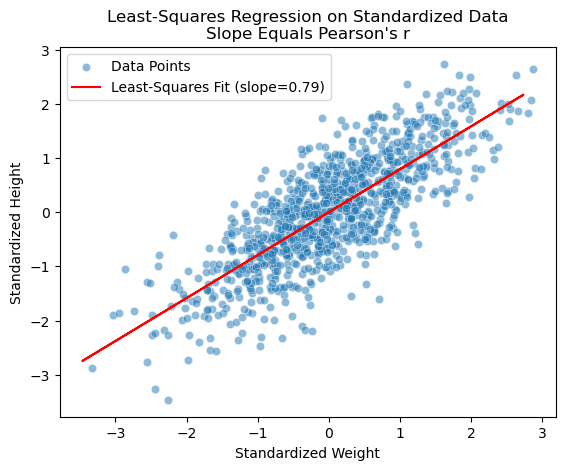

In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

mean = [80, 175] # 80 kg (180 lb), 175 cm (5 ft 9 in)
cov = [[1, .8], [.8, 1]]
data = rng.multivariate_normal(mean=mean, cov=cov, size=1000)
df = pd.DataFrame(data, columns=('weight', 'height'))

# Standardize the data
df['weight_std'] = (df['weight'] - df['weight'].mean()) / df['weight'].std()
df['height_std'] = (df['height'] - df['height'].mean()) / df['height'].std()

X = sm.add_constant(df['height_std'])
Y = df['weight_std']
model = sm.OLS(X, Y)
results = model.fit()
intercept, slope = results.params.iloc[0]

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

sns.scatterplot(x='weight_std', y='height_std', data=df, alpha=0.5, label='Data Points')
plt.plot(df['height_std'], slope * df['height_std'] + intercept, color='red', label=f'Least-Squares Fit (slope={slope:.2f})')
plt.xlabel('Standardized Weight')
plt.ylabel('Standardized Height')
plt.title("Least-Squares Regression on Standardized Data\nSlope Equals Pearson's r")
plt.legend()
plt.show()

In [42]:
df = pd.DataFrame(data, columns=('weight', 'height'))
print("df.corr():")
display(df.corr().round(2))

df.corr():


,weight,height
weight,1.00,0.79
height,0.79,1.00


In [43]:
df['weight'].corr(df['height'], method = 'pearson')


np.float64(0.7925881182009408)

In [44]:
df['weight'].corr(df['height'], method = 'pearson')

np.float64(0.7925881182009408)

In [45]:
df.cov()

,weight,height
weight,1.021281,0.781848
height,0.781848,0.952807


In [46]:
((df.weight - df.weight.mean()) * (df.height - df.height.mean())).sum() / (len(df) - 1)

np.float64(0.7818483509958327)

### Spearman’s Rank Correlation Coefficient
Spearman’s Rank Correlation assesses monotonic relationships (whether linear or not), unlike Pearson's which assesses linear relationships.

[Ranking](https://en.wikipedia.org/wiki/Ranking_(statistics)) orders numerical or ordinal values.

| Student | Score | Rank |
|---------|-------|------|
| Bob     | 95    | 1    |
| Alice   | 85    | 2    |
| Dave    | 85    | 2    |
| Carol   | 75    | 4    |
| Eve     | 65    | 5    |

In [48]:
from scipy.stats import spearmanr

spearman_corr, p_value = spearmanr(df['weight'], df['height'])
print(f"Spearman's Rank Correlation Coefficient: {spearman_corr:.3f}")
print(f"P-value: {p_value:.3e}")

ranked_df = df[['weight', 'height']].rank()  # Rank data
spearman_corr_matrix = ranked_df.corr(method='spearman')
spearman_corr_matrix

Spearman's Rank Correlation Coefficient: 0.780
P-value: 4.025e-205


,weight,height
weight,1.000000,0.779691
height,0.779691,1.000000


Monotonic
Spearman's Rank Correlation Coefficient: 1.000
P-value: 0.000e+00


,x,y
x,1.0,-1.0
y,-1.0,1.0


Monotonic and Linear
Spearman's Rank Correlation Coefficient: 1.000
P-value: 0.000e+00


,x,y
x,1.0,-1.0
y,-1.0,1.0


Non-Monotonic 1
Spearman's Rank Correlation Coefficient: -0.473
P-value: 5.221e-04


,x,y
x,1.0,-1.0
y,-1.0,1.0


Non-Monotonic 2
Spearman's Rank Correlation Coefficient: -0.295
P-value: 3.730e-02


,x,y
x,1.0,-1.0
y,-1.0,1.0


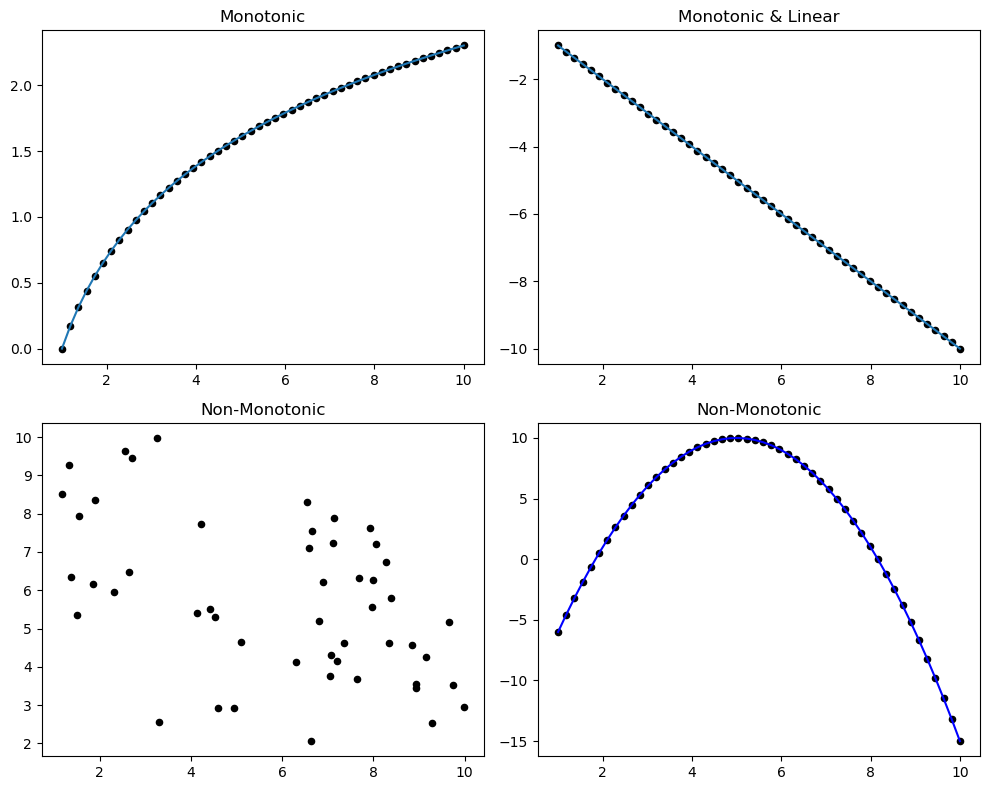

In [61]:
def spearman_corr(x, y):
    spearman_corr, p_value = spearmanr(x, y)
    print(f"Spearman's Rank Correlation Coefficient: {spearman_corr:.3f}")
    print(f"P-value: {p_value:.3e}")

    df = pd.DataFrame({'x':x_monotonic_linear, 'y': y_monotonic_linear})

    ranked_df = df[['x', 'y']].rank()
    spearman_corr_matrix = ranked_df.corr(method='spearman')
    display(spearman_corr_matrix)


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

x_monotonic = np.linspace(1, 10, 50)
y_monotonic = np.log(x_monotonic)
axes[0, 0].scatter(x_monotonic, y_monotonic, s=20, color='black')
axes[0, 0].plot(x_monotonic, y_monotonic, color='tab:blue', label="Monotonic")
axes[0, 0].set_title("Monotonic")
x_monotonic_linear = np.linspace(1, 10, 50)
y_monotonic_linear = -x_monotonic_linear
axes[0, 1].scatter(x_monotonic_linear, y_monotonic_linear, s=20, color='black')
axes[0, 1].plot(x_monotonic_linear, y_monotonic_linear, color='tab:blue', label="Monotonic & Linear")
axes[0, 1].set_title("Monotonic & Linear")
x_non_monotonic1 = np.random.uniform(1, 10, 50)
y_non_monotonic1 = np.random.uniform(1, 10, 50)
axes[1, 0].scatter(x_non_monotonic1, y_non_monotonic1, s=20, color='black')
axes[1, 0].set_title("Non-Monotonic")
x_non_monotonic2 = np.linspace(1, 10, 50)
y_non_monotonic2 = -1 * (x_non_monotonic2 - 5)**2 + 10
axes[1, 1].scatter(x_non_monotonic2, y_non_monotonic2, s=20, color='black')
axes[1, 1].plot(x_non_monotonic2, y_non_monotonic2, color='blue')
axes[1, 1].set_title("Non-Monotonic")

plt.tight_layout()
plt.show()

In [67]:
print('__________________ Monotonic __________________')
spearman_corr(x_monotonic, y_monotonic)
print('__________________ Monotonic and Linear __________________')
spearman_corr(x_monotonic_linear, y_monotonic_linear)
print('__________________ Non-Monotonic 1 __________________')
spearman_corr(x_non_monotonic1, y_non_monotonic1)
print('__________________ Non-Monotonic 2 __________________')
spearman_corr(x_non_monotonic2, y_non_monotonic2)

__________________ Monotonic __________________
Spearman's Rank Correlation Coefficient: 1.000
P-value: 0.000e+00


,x,y
x,1.0,-1.0
y,-1.0,1.0


__________________ Monotonic and Linear __________________
Spearman's Rank Correlation Coefficient: -1.000
P-value: 0.000e+00


,x,y
x,1.0,-1.0
y,-1.0,1.0


__________________ Non-Monotonic 1 __________________
Spearman's Rank Correlation Coefficient: -0.473
P-value: 5.221e-04


,x,y
x,1.0,-1.0
y,-1.0,1.0


__________________ Non-Monotonic 2 __________________
Spearman's Rank Correlation Coefficient: -0.295
P-value: 3.730e-02


,x,y
x,1.0,-1.0
y,-1.0,1.0


Spearman's Rank Correlation Coefficient: 1.000
P-value: 0.000e+00


,x,y
x,1.0,-1.0
y,-1.0,1.0


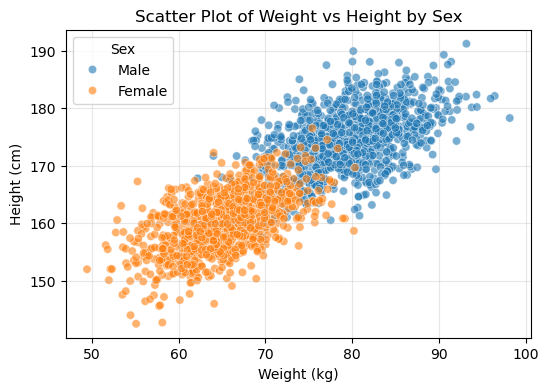

In [40]:
# Generate male data
mean_men = [80, 175]  # 80 kg (180 lb), 175 cm (5 ft 9 in)
cov_men = [[30, 15], [15, 30]]
data_men = rng.multivariate_normal(mean=mean_men, cov=cov_men, size=1000)
men = pd.DataFrame(data_men, columns=['weight', 'height'])
men['sex'] = 'Male'

# Generate female data
mean_women = [65, 160]  # 65 kg (143 lb), 160 cm (5 ft 3 in)
cov_women = [[25, 15], [15, 25]]
data_women = rng.multivariate_normal(mean=mean_women, cov=cov_women, size=1000)
women = pd.DataFrame(data_women, columns=['weight', 'height'])
women['sex'] = 'Female'

# Combine male and female data
df = pd.concat([men, women])

plt.figure(figsize=(6, 4))
# sns.scatterplot(data=df, x='weight', y='height', alpha=0.6)
sns.scatterplot(data=df, x='weight', y='height', hue='sex', alpha=0.6)
plt.title("Scatter Plot of Weight vs Height by Sex")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend(title="Sex")
plt.grid(alpha=0.3)
plt.show()

References:
- https://snakebear.science/08-Statistics/08_2_Basic_Statistics_Correlations.html